#===cell 1 - metadata ===

###course:signals and systems - programming section(python)
**Full Name:** Asal Asadi

**Student ID:** 402120833

**Source:** *signal and systems laboratory with MATLAB*

**Problem Number (chapter.secction.quistion_num):** 4.13.8

#===Cell 2 - Upload & display question image :===

##Problem statement.(image)
 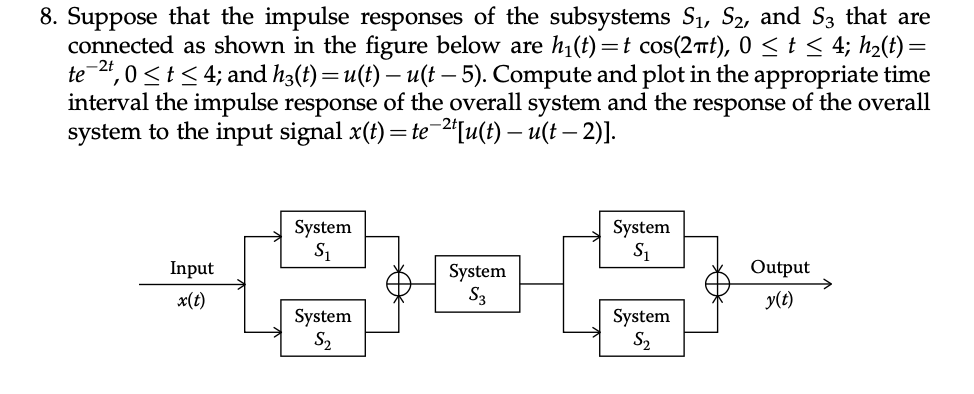

#===Cell 3 - Assumptions & methods ===

<h2>Assumptions</h2>
<p>
  All subsystems are assumed to be <strong>linear time-invariant (LTI)</strong> and causal.
  The impulse responses of subsystems <em>S<sub>1</sub></em>, <em>S<sub>2</sub></em>, and <em>S<sub>3</sub></em>
  are time-limited and defined as specified in the problem statement.
  The input signal is also assumed to be causal and time-limited.
</p>

<h2>Methodology</h2>
<p>
  The parallel subsystems <em>S<sub>1</sub></em> and <em>S<sub>2</sub></em> are combined using the principle of superposition.
  The resulting impulse response is then cascaded with subsystem <em>S<sub>3</sub></em>, followed by another parallel
  combination of <em>S<sub>1</sub></em> and <em>S<sub>2</sub></em>. The overall impulse response of the system is obtained
  through successive convolution of the corresponding impulse responses.
</p>
<p>
  Continuous-time convolutions are approximated numerically using discrete-time convolution with a uniform sampling interval.
  The output signal is computed by convolving the input signal with the overall impulse response, and the results are presented
  using time-domain plots over the appropriate time intervals.
</p>

# New Section

#===Cell 4 Solution ===

<h3>Step 1 — Imports and basic setup</h3>
<p>
We import NumPy for numerical work and Matplotlib for plotting. We also set default figure size and enable grid lines
to make plots easier to read.
</p>

<h2>Initialization</h2>
<p>
The numerical framework required for time-domain analysis of linear time-invariant systems is
initialized. A suitable discretization strategy is adopted to enable accurate approximation of
continuous-time convolution operations.
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (9, 4)
plt.rcParams["axes.grid"] = True

<h3>Step 2 — Time axis and helper functions</h3>
<p>
We define a time grid using a sampling step <code>dt</code>. We also define the unit step function <code>u(t)</code>
and a rectangular window <code>rect(t,T)=u(t)-u(t-T)</code>. These help us enforce the given time-limited definitions
(e.g., signals that are nonzero only on a finite interval).
</p>

In [2]:
dt = 1e-3
t_max = 15.0
t = np.arange(0, t_max + dt, dt)

def u(tt):
    return (tt >= 0).astype(float)

def rect(tt, T):
    return u(tt) - u(tt - T)

<h3>Step 3 — Define and plot h1(t)</h3>
<p>
The impulse response of subsystem S1 is:
<code>h1(t) = t cos(2πt)</code> for <code>0 ≤ t ≤ 4</code>, and 0 otherwise.
We apply the window <code>rect(t,4)</code> to zero it outside the interval.
</p>

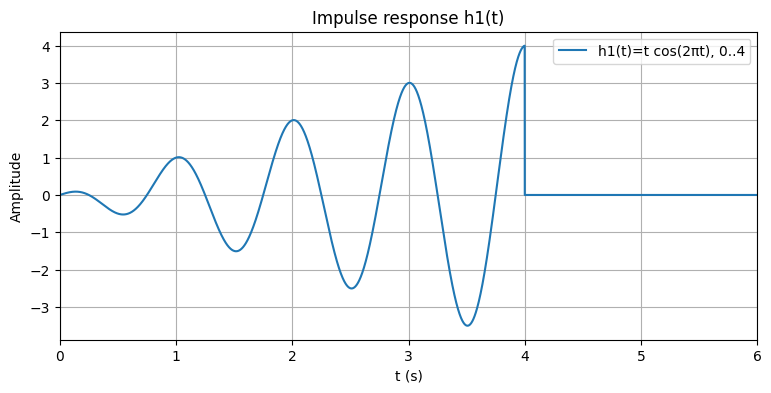

In [3]:
h1 = t * np.cos(2*np.pi*t) * rect(t, 4)

plt.plot(t, h1, label="h1(t)=t cos(2πt), 0..4")
plt.xlim(0, 6)
plt.title("Impulse response h1(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 4 — Define and plot h2(t)</h3>
<p>
The impulse response of subsystem S2 is:
<code>h2(t) = t e^{-2t}</code> for <code>0 ≤ t ≤ 4</code>, and 0 otherwise.
We use <code>rect(t,4)</code> to enforce that time support.
</p>


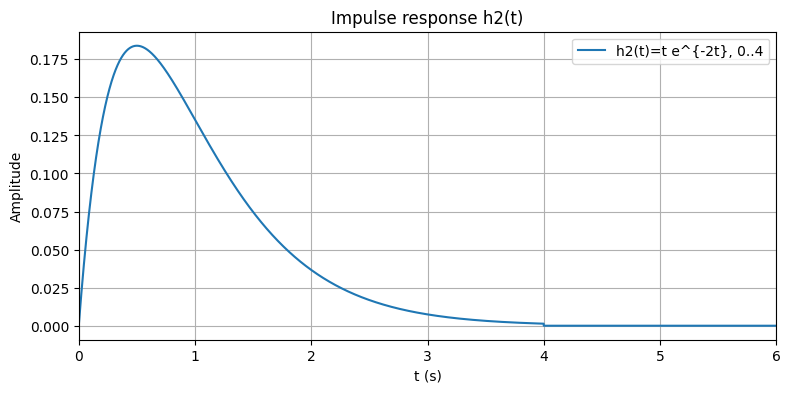

In [4]:
h2 = t * np.exp(-2*t) * rect(t, 4)

plt.plot(t, h2, label="h2(t)=t e^{-2t}, 0..4")
plt.xlim(0, 6)
plt.title("Impulse response h2(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 5 — Define and plot h3(t)</h3>
<p>
The impulse response of subsystem S3 is:
<code>h3(t) = u(t) - u(t-5)</code>, which is a rectangular pulse equal to 1 on <code>[0,5)</code>.
</p>

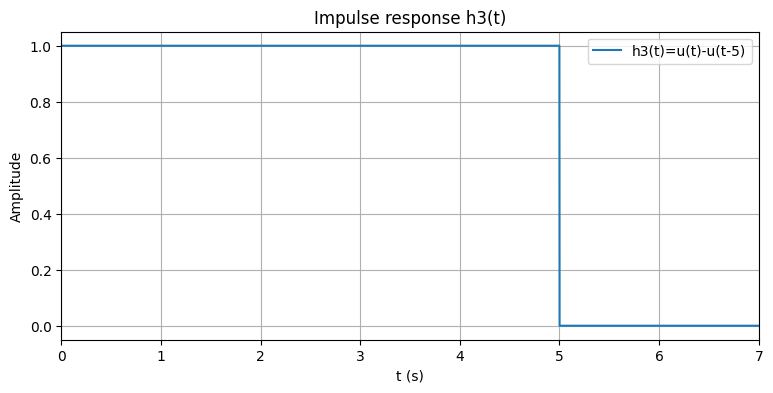

In [5]:
h3 = rect(t, 5)

plt.plot(t, h3, label="h3(t)=u(t)-u(t-5)")
plt.xlim(0, 7)
plt.title("Impulse response h3(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 6 — Parallel combination (S1 and S2)</h3>
<p>
From the block diagram, S1 and S2 are in parallel (same input, summed outputs).
For LTI systems, the equivalent impulse response of a parallel sum is:
<code>h12(t) = h1(t) + h2(t)</code>.
</p>

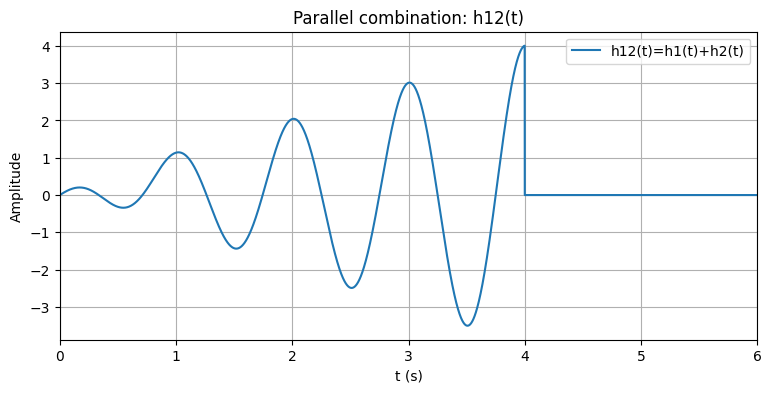

In [6]:
h12 = h1 + h2

plt.plot(t, h12, label="h12(t)=h1(t)+h2(t)")
plt.xlim(0, 6)
plt.title("Parallel combination: h12(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 7 — First convolution: ha(t) = h12 * h3</h3>
<p>
The output of the first parallel block passes through S3, so the equivalent impulse response becomes:
<code>ha(t) = h12(t) * h3(t)</code>.
We compute numerical convolution using <code>np.convolve</code> and multiply by <code>dt</code> to approximate the integral.
</p>

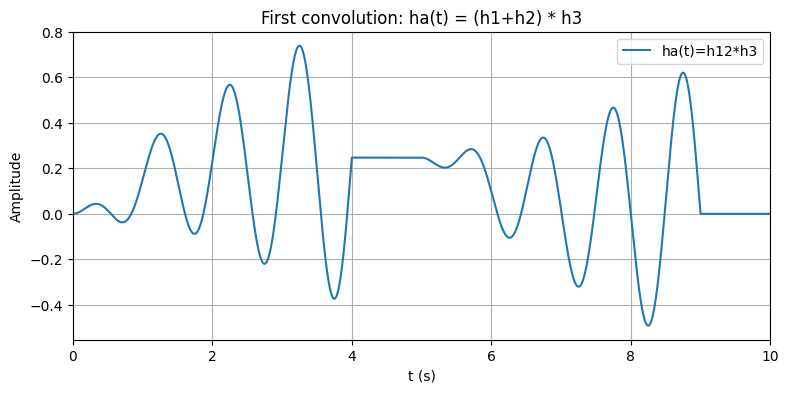

In [7]:
ha = np.convolve(h12, h3) * dt
t_ha = np.arange(0, len(ha)) * dt

plt.plot(t_ha, ha, label="ha(t)=h12*h3")
plt.xlim(0, 10)
plt.title("First convolution: ha(t) = (h1+h2) * h3")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 8 — Overall impulse response h(t)</h3>
<p>
After S3, the signal enters the same parallel combination (S1 and S2) again.
Therefore the overall impulse response is:
<code>h(t) = ha(t) * h12(t) = (h12*h3)*h12</code>.
Again, we use numerical convolution and scale by <code>dt</code>.
</p>

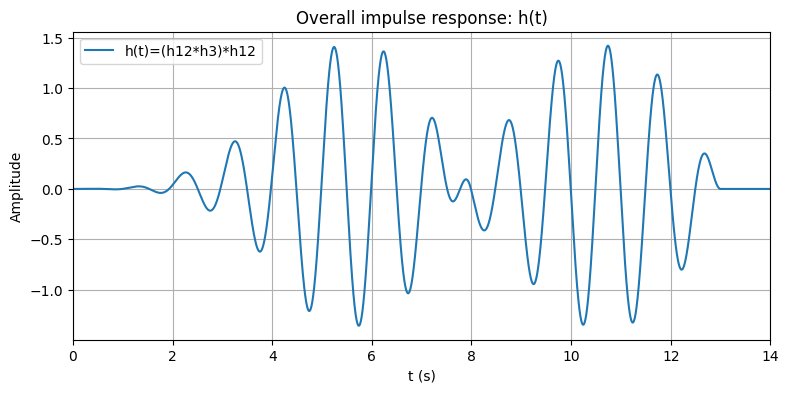

In [8]:
h = np.convolve(ha, h12) * dt
t_h = np.arange(0, len(h)) * dt

plt.plot(t_h, h, label="h(t)=(h12*h3)*h12")
plt.xlim(0, 14)
plt.title("Overall impulse response: h(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 9 — Define and plot input x(t)</h3>
<p>
The input signal is:
<code>x(t) = t e^{-2t} [u(t) - u(t-2)]</code>,
which means it is nonzero only for <code>0 ≤ t ≤ 2</code>.
We implement this using <code>rect(t,2)</code>.
</p>

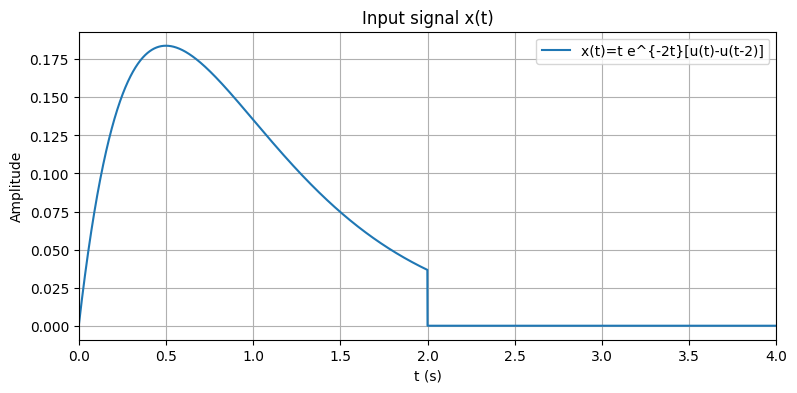

In [9]:
x = t * np.exp(-2*t) * rect(t, 2)

plt.plot(t, x, label="x(t)=t e^{-2t}[u(t)-u(t-2)]")
plt.xlim(0, 4)
plt.title("Input signal x(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 10 — Output response y(t)</h3>
<p>
For an LTI system, the output is the convolution of the input and the overall impulse response:
<code>y(t) = x(t) * h(t)</code>.
We compute it numerically with <code>np.convolve</code> and scale by <code>dt</code>.
</p>

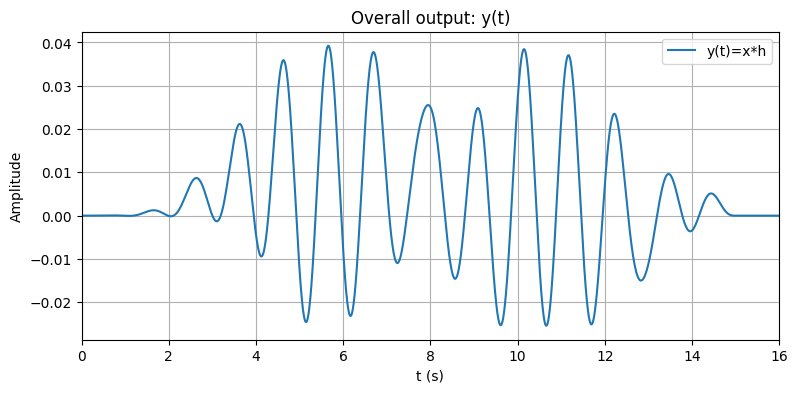

In [10]:
y = np.convolve(x, h) * dt
t_y = np.arange(0, len(y)) * dt

plt.plot(t_y, y, label="y(t)=x*h")
plt.xlim(0, 16)
plt.title("Overall output: y(t)")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

<h3>Step 11 — Optional zoom (effective support)</h3>
<p>
Based on supports:
<ul>
  <li>h1, h2 live on [0,4]</li>
  <li>h3 lives on [0,5]</li>
  <li>h(t) = h12*h3*h12 lives on [0, 4+5+4] = [0,13]</li>
  <li>x(t) lives on [0,2] so y(t)=x*h lives on [0,15]</li>
</ul>
We zoom to these intervals for clearer visualization.
</p>

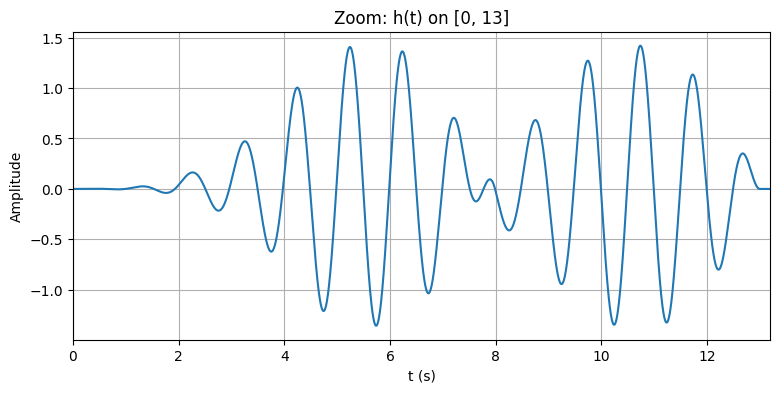

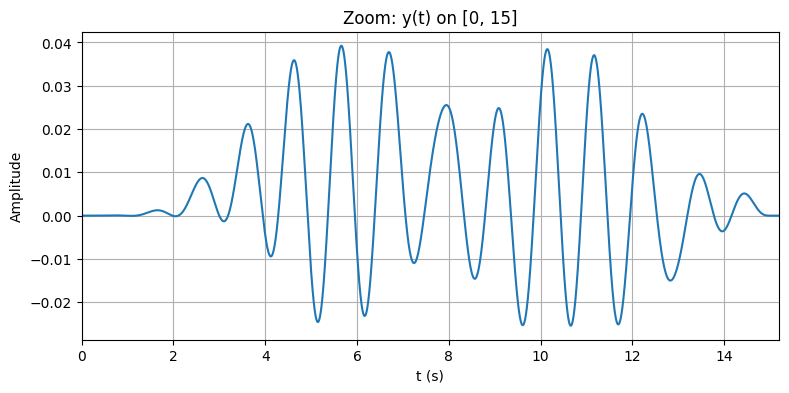

In [11]:
plt.plot(t_h, h)
plt.xlim(0, 13.2)
plt.title("Zoom: h(t) on [0, 13]")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.show()

plt.plot(t_y, y)
plt.xlim(0, 15.2)
plt.title("Zoom: y(t) on [0, 15]")
plt.xlabel("t (s)")
plt.ylabel("Amplitude")
plt.show()

# ===Cell 5 - Result Analysis ===

<h2>Result Analysis</h2>
<p>
The obtained overall impulse response is causal and time-limited, which is consistent with the finite
supports of the individual subsystems. Since the parallel subsystems are combined through superposition
and cascaded with a finite-duration system, the resulting impulse response exhibits oscillatory behavior
with a duration equal to the sum of the individual supports.
</p>

<p>
The output signal is also causal and confined to the expected time interval. Its shape reflects the
interaction between the input signal and the oscillatory nature of the overall impulse response.
The amplitude and duration of the output are influenced by both the exponential decay of the input
and the frequency components introduced by the subsystems.
</p>

<p>
Overall, the numerical results are consistent with theoretical expectations for linear time-invariant
systems, confirming the correctness of the system modeling and convolution-based analysis.
</p>